# Modelo de Regresión Lineal Simple
#### George Canavos

In [1]:
import math as m
import statistics as stats
import matplotlib.pyplot as plt
from matplotlib import collections as mc
import seaborn as sns
from jupyterthemes import jtplot

ModuleNotFoundError: No module named 'jupyterthemes'

In [2]:
%matplotlib inline

In [12]:
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [9]:
plt.style.use('dark_background')
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.figsize'] = (10, 6)

### Datos de calificaciones promedio (CP) y salario inicial (miles de dólares)

In [10]:
CP = [2.95, 3.20, 3.40, 3.60, 3.20, 2.85, 3.10, 2.85,
                3.05, 2.70, 2.75, 3.10, 3.15, 2.95, 2.75]

salario_inicial = [18.5, 20.0, 21.1, 22.4, 21.2, 15.0, 18.0,
                            18.8, 15.7, 14.4, 15.5, 17.2, 19.0,17.2, 16.8]

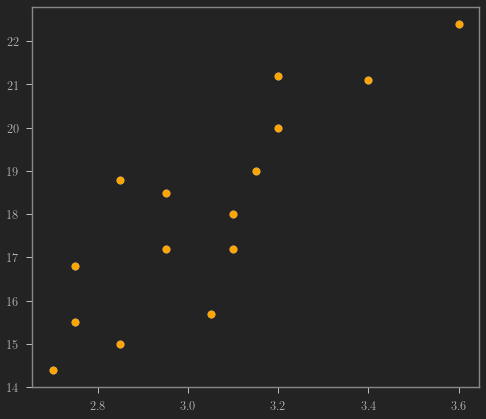

In [13]:
fig, ax = plt.subplots()
ax.scatter(CP, salario_inicial, color='orange', s=60,
          edgecolors='white')
# sns.scatterplot(x=CP, y=salario_inicial, s=60, ax=ax,
#               legend=False, alpha=0.8)

### Estimación por Mínimos Cuadrados para el Modelo Lineal Simple

Se supone un modelo de forma:
    $$Y_i=\beta_0 + \beta_1x_i+ \epsilon_i;\;\;i=1,2, ...,n\;\;\;\;\;(1)$$

Cada observación $Y_i$ es una variable aleatoria que es la suma de dos componentes; el término no aleatorio $\beta_0+\beta_1x_i$, y la componente aleatoria $\epsilon_i$. Si $e_i$ tuviera valor cero, la observación $Y_i$ se encontraría precisamente sobre la línea de regresión $\beta_0+\beta_1x_i$. Por lo tanto, $e_i$ es la distancia vertical de la observación a la línea de regresión. Dado que se supone:

$$E(\epsilon_i)=0;\;Var(\epsilon_i)=\sigma^2;\;\;i=1, 2, ...,n.$$
     y
$$Cov(\epsilon_i, \epsilon_i)=0\;\;\;\;\;i\neq j$$
    y
$$Var(Y_i)=Var(\beta_0+\beta_1x_1+\epsilon_i)=Var(\epsilon_i)=\sigma^2.$$


El último resultado surge del hecho de que la varianza de una variable aleatoria no varía con respecto a la localización; en este caso, el <i>corrimiento</i> en localización viene dado por el término no aleatorio $\beta_0+\beta_1x_i$. Por lo tanto, en términos reales, lo que se supone es que para cada calificación promedio $x$ existe una distribución de probabilidad para los salarios iniciales cuya media es una función líneal de $x$ y cuya varianza es la mísma para toda $x$.

Para obtener los estimadores de mínimos cuadrados de $\beta_0$ t $\beta_1$, se generalizará un conjunto de datos consistente en $n$ pares: $(y_1, x_1), (y_2, x_2),..., (y_n, x_n)$, donde los valores de $y$ son las observaciones de la variable aleatoria respuesta. El método de mínimos cuadrados considera la desviación de la observación $Y_i$ de su valor medio y determina los valores de $\beta_0$ y $\beta_1$ que minimizan la suma de los cuadrados de estas desviaciones. La <i>i-esima</i> desviación o error es:
$$\epsilon_i=Y_i-(\beta_0+\beta_1x_i)$$

Y la suma de los cuadrados de los errores es:
$$\sum_{i=1}^{{n}}e_i^2=\sum_{i=1}^{{n}}(Y_i+\beta_0+\beta_1x_i)^2\;\;\;\;\;\;\;(2)$$

Los estimadores de mínímos cuadrados de $\beta_0$ y $\beta_1$, se obtinen mediante la diferenciación de $(2)$.

$$\frac{\partial\sum \epsilon_i^2}{{\partial\beta_0}}=-2\sum(Y_i-b_0-b_1x_i)=0$$

$$\frac{\partial\sum \epsilon_i^2}{{\partial\beta_1}}=-2\sum x_i(Y_i-b_0-b_1x_i)=0$$

Siendo $b_0$ y $b_1$ los estimadores de mínimos cuadrados de $\beta_0$  $\beta_1$, respectivamente. Al simplificar y distribuir las sumas en las expresiones de arriba:

$$\sum_{i=1}^{{n}}Y_i=nb_0+b_1\sum_{i=1}^{{n}}x_i;\;\;\;\;\;\;(3)$$

y

$$\sum_{i=1}^{{n}}x_iY_i=b_0\sum_{i=1}^{{n}}x_i+b_1\sum_{i=1}^{{n}}x_i^2;\;\;\;\;\;\;(4)$$

Las expresiones arriba expuestas son las que se conocen como las <i>ecuaciones normales</i>; al dividir $(3)$ por $n$ (dadas las realizaciones $y_1, y_2, ..., y_n$) se obtiene:
$$\frac{\sum y_i}{{n}}=b_0+b_1\frac{\sum x_i}{{n}}$$

Entonces el estimador de mínimos cuadrados de $\beta_0$ es:
$$b_0=\frac{\sum_{i=1}^{{n}} y_i}{{n}}-b_1\frac{\sum_{i=1}^{{n}}x_i}{{n}}=\bar{y} - b_1\bar{x}\;\;\;\;\;\;\;(5)$$

Al sustituir $(5)$ en $(4)$, se obtiene:

$$\sum x_iy_i=\left (\begin{array}{c}\frac{\sum y_i}{{n}} - b_1\frac{\sum x_i}{{n}}\end{array} \right ) \sum x_i + b_1\sum x_i^2$$

Después de resolver para $b_1$ esa expresión se reduce a:

$$b_1=\frac{\sum_{i=1}^{{n}}x_i y_i - \frac{\left (\begin{array}{c}\sum_{i=1}^n x_i\end{array} \right ) \left ( \begin{array}{c}\sum_{i=1}^n y_i \end{array} \right )}{{n}}}{{\sum_{i=1}^n x_i^2- \frac{(\sum_{i=1}^n x_i)^2}{{n}}}}=\frac{\sum_{i=1}^n (x_i - \bar{x})(y_i-\bar{y})}{{\sum_{i=1}^n (x_i- \bar{x})^2}}\;\;\;\;(6)$$

Los valores dados para $(5)$ y $(6)$ ($b_1$ y $b_0$) son los que minimizan la suma de los cudrados de los errores.

La recta de regresión estimada para el modelo $(1)$ es:
$$\hat{Y_i}=b_0+b_1x_i$$

Donde si se sustituye $(5)$ por $b_0$ se tiene:
$$\hat{Y_i} = \bar(Y) - b_1\hat{x} + b_1 x_i \\
= \bar{Y} + b_1(x_i- \bar{x})$$

Basados en la expresión $(2)$, la diferencia entre la realización $y_i$ y el valor estimado $\hat{y_i}$ es un estimador del error correspondiente; el cual se conoce como el <i>i-ésimo</i> residual y se denota por:
$$\epsilon_i=y_i - \hat{y_i}$$

Los residuos $\epsilon_1, \epsilon_2, ..., \epsilon_n$ son importantes debido a que proporcionan información sobre lo que puede faltar en el modelo.

In [14]:
datos = {'x': CP,
         'y':salario_inicial,
        'xy':[x*y for x, y in zip(CP, salario_inicial)],
        'x2':[x**2 for x in CP],
        'y2':[y**2 for y in salario_inicial]}

In [15]:
print("{:<11} {:<11} {:<11} {:<11} {:<11}"
      .format('x', 'y', 'xy', 'x2', 'y2'))

print('---------------------------------------------------')
x, y, xy, x2, y2 = datos.keys()
for i in range(15):
    x, y, xy, x2, y2 = datos.keys()
    print("{:<10} {:<10} {:<10} {:<10} {:<10}"
    .format(round(datos[x][i],2), 
            round(datos[y][i],2),
            round(datos[xy][i],2), 
            round(datos[x2][i], 2), round(datos[y2][i],2)))

x           y           xy          x2          y2         
---------------------------------------------------
2.95       18.5       54.58      8.7        342.25    
3.2        20.0       64.0       10.24      400.0     
3.4        21.1       71.74      11.56      445.21    
3.6        22.4       80.64      12.96      501.76    
3.2        21.2       67.84      10.24      449.44    
2.85       15.0       42.75      8.12       225.0     
3.1        18.0       55.8       9.61       324.0     
2.85       18.8       53.58      8.12       353.44    
3.05       15.7       47.88      9.3        246.49    
2.7        14.4       38.88      7.29       207.36    
2.75       15.5       42.62      7.56       240.25    
3.1        17.2       53.32      9.61       295.84    
3.15       19.0       59.85      9.92       361.0     
2.95       17.2       50.74      8.7        295.84    
2.75       16.8       46.2       7.56       282.24    


In [16]:
sum_x = sum(datos['x'])
sum_y = sum(datos['y'])
sum_xy = sum(datos['xy'])
sum_x2 = sum(datos['x2'])
sum_y2 = sum(datos['y2'])

In [17]:
b1 = (sum_xy - (sum_x)*(sum_y) / 15) / (sum_x2 - sum_x**2/15)
b1

8.118510158013954

In [18]:
b0 = sum_y / 15 - b1 * sum_x / 15
b0

-6.626937547029094

Es decir el cálculo es, simplemente:

$$b_1 = \frac{830.425 - \frac{(45.6)(270.8)}{{15}}}{{139.51 - \frac{(45.6)^2}{{15}}}}=8.12$$

y

$$b_0= \frac{270.8}{{15}} - (8.12) \frac{45.6}{{15}} = -6.63$$

Sim embargo, el paquete <i>statistics</i> ofrece medios más cómodos de obtener ese resultado.

In [19]:
rl = stats.linear_regression(CP, salario_inicial)

In [20]:
rl.slope

8.118510158013544

In [21]:
rl.intercept

-6.62693754702784

### Salario Estimado

Los valores estimados para el <i>salario inicial</i> serán entonces el resultado de la suma algebraica del valor del intercepto $b_0$ más el producto del coeficiente de regresión $b_1$ por cada uno de los valores de <i>CP</i>; esta operación producirá una lista de valores estimados de la misma longitud a la lista de valores iniciales.

In [22]:
salario_estimado = [rl.intercept + rl.slope * i for i in CP]

salario_estimado = [round(est, 2) for est in salario_estimado]

Los residuos se obtienen a partir de la diferencia entre los valores reales y los estimados.

In [23]:
residuos = [round(s1 - s2, 2) for s1, s2 in 
            zip(salario_inicial, salario_estimado)]

In [24]:
cuadrado_residuos = [res**2 for res in residuos]

In [25]:
dest ={'y_est': salario_estimado,
      'residuos': [i - j for i, j in zip(salario_inicial, salario_estimado)],
      'residuos2':[(i - j)**2 for i, j in zip(salario_inicial, salario_estimado)]}

In [26]:
datos2 = dict(**datos, **dest)
#datos2.keys()
x, y, xy, x2, y2, yest, resid, resid2  = datos2.keys()
yest

'y_est'

In [32]:
print("{:<11} {:<11} {:<11} {:<11} {:<11} {:<11} {:<11} {:<11}"
      .format('x', 'y', 'xy', 'x2', 'y2', 'yest', 'Residuo', 'ResidCuad'))

print('--------------------' * 5) 
x, y, xy, x2, y2, yest, resid, resid2  = datos2.keys()
for i in range(15):
    #x, y, xy, x2, y2, yest, resid, resid2 = datos2.keys()
    print("{:<10} {:<10} {:<10} {:<10} {:<10} {:<16} {:<16} {:<16}"
    .format(round(datos2[x][i],2), 
            round(datos2[y][i],2),
            round(datos2[xy][i],2), 
            round(datos2[x2][i], 2), 
            round(datos2[y2][i],2),
            round(datos2[yest][i],2),
            round(datos2[resid][i],2),
            round(datos2[resid2][i],2),
           ))
print('--------------------' * 5)
print("{:<10} {:<10} {:<10} {:<10} {:<10} {:<16} {:<16} {:<16}"
    .format(round(sum_x,2), 
            round(sum_y, 2),
            round(sum_xy,2), 
            round(sum_x2, 2), 
            round(sum_y2,2),
            round(sum(dest['y_est']),2),
            round(sum(dest['residuos']),2),
            round(sum(dest['residuos2']),2),
           ))


x           y           xy          x2          y2          yest        Residuo     ResidCuad  
----------------------------------------------------------------------------------------------------
2.95       18.5       54.58      8.7        342.25     17.32            1.18             1.39            
3.2        20.0       64.0       10.24      400.0      19.35            0.65             0.42            
3.4        21.1       71.74      11.56      445.21     20.98            0.12             0.01            
3.6        22.4       80.64      12.96      501.76     22.6             -0.2             0.04            
3.2        21.2       67.84      10.24      449.44     19.35            1.85             3.42            
2.85       15.0       42.75      8.12       225.0      16.51            -1.51            2.28            
3.1        18.0       55.8       9.61       324.0      18.54            -0.54            0.29            
2.85       18.8       53.58      8.12       353.44     16.51 

La ecuación estimada de regresión es:
$$\widehat{salario\_inicial} = -6.63 + 8.12 \cdot CP$$

O ḿás bien para usar la notación comunmente usada:

$$\hat{y} = -6.63 + 8.12 \cdot x_i$$

Siendo $y=salario\_inicial$ la variable dependiente y $x=CP$ variable dependiente.

Al itentar interpretar esta ecuación se tiene que los valores de $\hat{y_i}$ son los estimadores para las medias de las distribuciones de probabilidad de los salarios iniciales correspondientes a las calificaciones promedio $x_i$. En este caso, como en muchos otros, intentar predecir la respuesta más alla del intervalo de valores de $x$ ($ 2.70, 3.60 $) puede producir resultados inesperados; por ejemplo, un valor de $x=0.5$ acarrearia una predicción $\hat{y}= -2.57$, lo cual sería absurdo. Es decir, que para intervalos más amplios de la variable de predicción, las estimaciones, en un caso como este al menos, deberían considerarse con reserva.


Los residuos son las diferencias entre las observaciones (salarios iniciales)  y sus valores estimados; en otras palabras, cada valor residual es la distancia vertical existente entre la observación y el punto sobre la recta estimada de regresión correspondiente.

La varianza ($\sigma^2$) de la variable respuesta es igual a la varianza del error. Dado que no es conocida, se estima mediante la suma de las diferencias al cuadrado $y_i - \hat{y_i}$, esta suma se divide por $n - 2$, siendo $n$ el numero de datos o grados de libertad, a los que se les resta 2 unidades al descontar la estimación del intercepto y el coeficiente de regresión:

$$s^2= \frac{\sum_{i=1}^{n}(y_i - \hat{y})^2}{{n - 2}}=\frac{\sum_{i=1}^{n} e_i^2}{{n-2}}$$

El estimador $s^2$ es conocido como <i>varianza residual</i> o <i>CME</i>, y la raíz cuadrada positiva $s$ se conoce como la <i>desviacion estándar residual</i>. Siendo la <i>varianza residual</i> una medida absoluta de qué tan bien se ajusta la recta estimada de regresión a las medias de las observaciones de la variable respuesta; por lo que a menor valor $s^2$ mejor será el ajuste al modelo. Si la forma del modelo de regresión es la correcta  $s^2$ es un estimador insesgado de $\sigma^2$.

In [28]:
eq = (r"$\widehat{salario\_inicial}=-6.63+8.12CP$")
# eq = (r"esto")

In [29]:
 l0 = list(zip(CP, salario_inicial))
 l0 = sorted(l0, key=lambda x: x[0])
 l1 = list(zip(CP, salario_estimado))
 l1 = sorted(l1, key=lambda x: x[0])
# list(zip(l0, l1))
lines = [[e, f] for e, f in zip(l0, l1)]

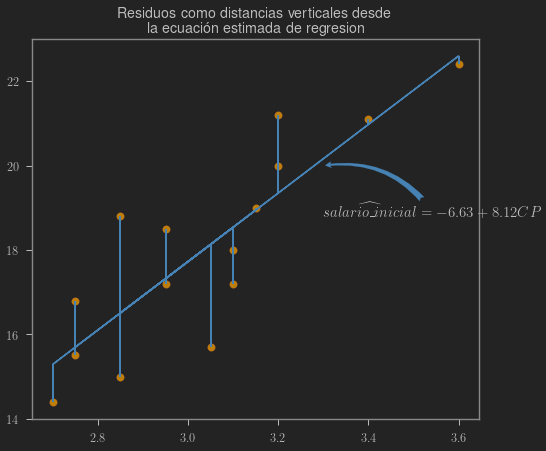

In [30]:
lc = mc.LineCollection(lines, colors='steelblue', linewidths=2)

# plt.figure(figsize=(10, 5))
fig, ax = plt.subplots()
# fig.set_size_inches(10, 5) # overrridden by plt.rcParams[figure.figsize]
ax.scatter(x=CP, y=salario_inicial, s= 60, edgecolor='r', color='orange', alpha=0.7)
ax.plot(CP, salario_estimado, color='steelblue')
#ax.text(3.5, 18, eq, color='C0',
#        horizontalalignment="right", verticalalignment='top', 
#        fontsize=15)
#ax.arrow(3.4, 18.1, 3.2, 19,width=0.2)
plt.title('Residuos como distancias verticales desde\nla ecuación estimada de regresion')
ax.annotate(eq, (3.3, 20), xytext=(0, -50),
           textcoords='offset points',
           fontsize = 15,
           arrowprops=dict(
           arrowstyle='fancy',
           color='steelblue',
           connectionstyle='arc3, rad=0.3'),)
# plt.plot([CP[0], sal_in[0]], [CP[0], sal_est[0]], 'bo', linestyle='--')
#ax.annotate('', xy = (cp[0], sal_in[0]),
#            xytext = (cp[1], 30), 
#            xycoords = 'data',
#            textcoords='offset points', color='steelblue',
#           arrowprops={'arrowstyle':'<->'})
# ax.plot([2.5, 14.5], [2.5, 15.5], color = 'steelblue', linestyle='--')
ax.add_collection(lc)
ax.autoscale()